Optimal k: 1
Accuracy Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



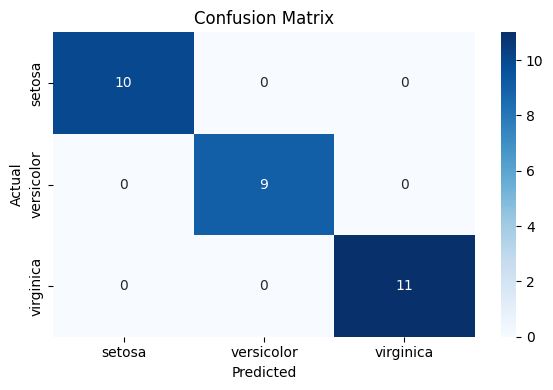

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

accuracies = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

optimal_k = k_range[accuracies.index(max(accuracies))]

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"Optimal k: {optimal_k}")
print(f"Accuracy Score: {acc_score:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


Optimal k: 1
Accuracy Score: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



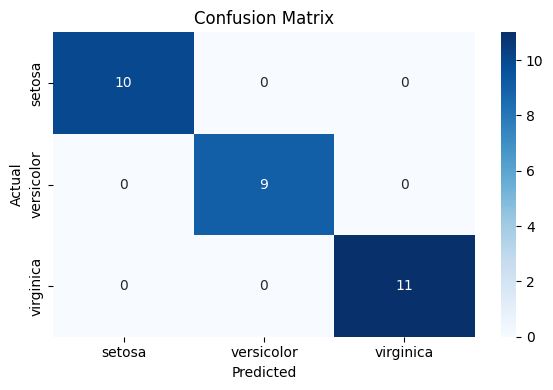

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from CSV
df = pd.read_csv("/content/iris (1) (1).csv")

# Feature columns and target
X = df.iloc[:, :-1].values
y = df['species'].astype('category').cat.codes  # Convert species to numerical codes

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Find best k
accuracies = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

optimal_k = k_range[accuracies.index(max(accuracies))]

# Train final model
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluation
acc_score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = df['species'].astype('category').cat.categories
report = classification_report(y_test, y_pred, target_names=class_names)

print(f"Optimal k: {optimal_k}")
print(f"Accuracy Score: {acc_score:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


Optimal k: 18
Accuracy Score: 0.76
Confusion Matrix:
[[88 11]
 [26 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        99
           1       0.72      0.53      0.61        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.76      0.75       154



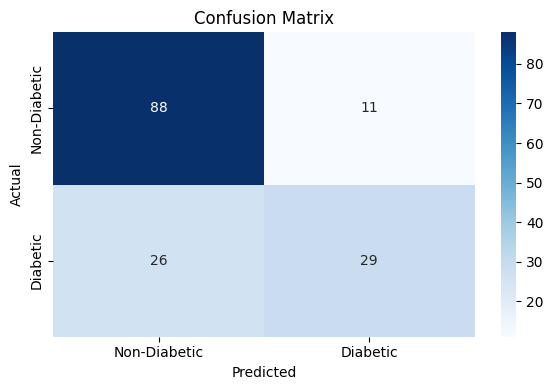

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from CSV
df = pd.read_csv("/content/diabetes.csv")  # Make sure this file exists in the same directory

# Separate features and target
X = df.drop("Outcome", axis=1).values
y = df["Outcome"].values

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Find best k
accuracies = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

optimal_k = k_range[accuracies.index(max(accuracies))]

# Train final model
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluation
acc_score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Optimal k: {optimal_k}")
print(f"Accuracy Score: {acc_score:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


Optimal k: 7
Accuracy Score: 0.92


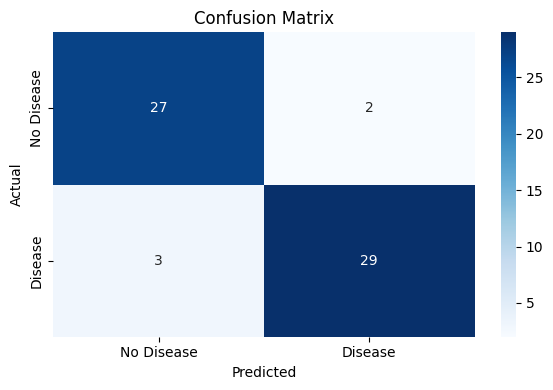

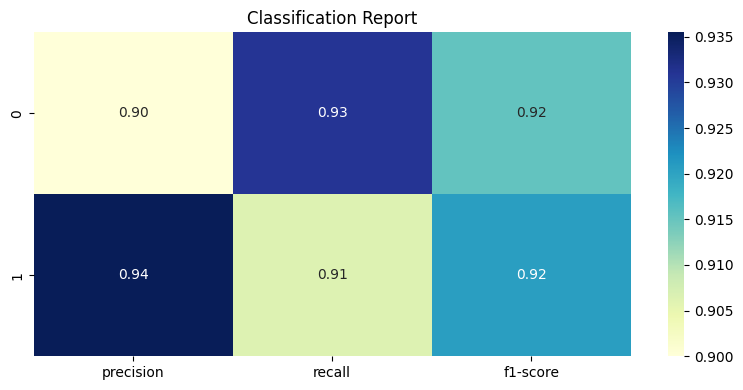

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/heart.csv")

# Split into features and target
X = df.drop("target", axis=1).values
y = df["target"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Try different values of k to find best accuracy
accuracies = []
k_range = range(1, 21)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

optimal_k = k_range[np.argmax(accuracies)]

# Train final model with best k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print(f"Optimal k: {optimal_k}")
print(f"Accuracy Score: {acc:.2f}")

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Plot Classification Report
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:2, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Report")
plt.tight_layout()
plt.show()


Iris Dataset – How to choose the value of k in KNN?
To choose the best k value in KNN, we evaluate model performance using different values of k and observe the accuracy rate and error rate on the test data.

A low k may lead to overfitting (high variance), while a high k may cause underfitting (high bias).

We select the k that gives the highest accuracy or lowest error rate, ensuring a good balance between bias and variance.

Diabetes Dataset – What is the purpose of feature scaling and how is it done?
Purpose: Feature scaling is important in KNN because it is a distance-based algorithm. Without scaling, features with larger numeric ranges dominate those with smaller ranges, leading to biased predictions.

How it's done: Feature scaling is typically performed using standardization, where features are rescaled to have a mean of 0 and a standard deviation of 1. This ensures all features contribute equally to the model.

Iris Dataset: How to choose the K value?
The value of K in the KNN algorithm determines how many neighbors influence classification.
To choose the best K, test multiple K values and compare their accuracy and error rate.
The optimal K is the one where accuracy is highest and error rate is lowest.

Diabetes Dataset: Purpose of Feature Scaling and How to Perform It?
Feature scaling ensures all features contribute equally to model training by bringing them to a common scale.
This is especially important for distance-based algorithms like KNN or gradient descent-based models.
It is commonly done using Standardization (Z-score) or Normalization (Min-Max scaling).



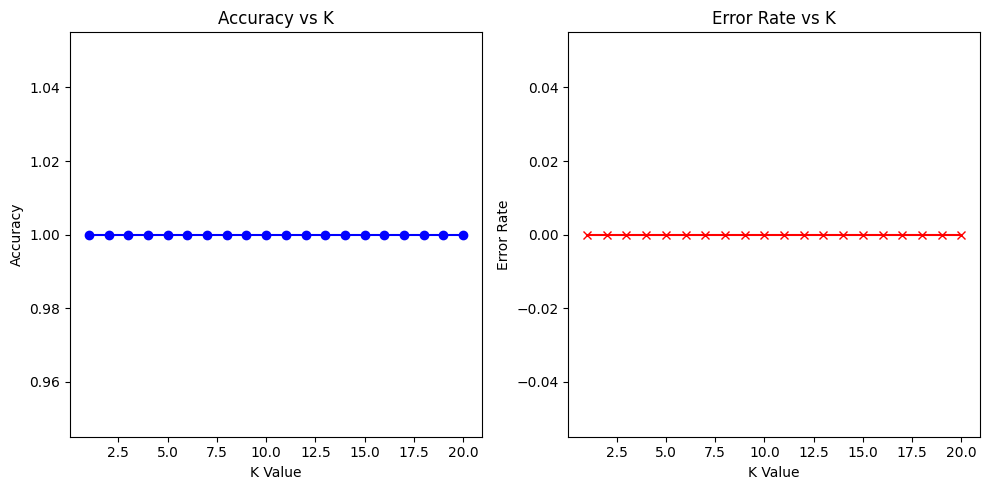

In [ ]:
#rough work , not actual code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load and prepare the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

accuracy_list = []
error_rate = []

# Try k values from 1 to 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)

    acc = accuracy_score(y_test, pred_k)
    accuracy_list.append(acc)
    error_rate.append(1 - acc)

# Plot Accuracy and Error Rate
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 21), accuracy_list, marker='o', color='blue')
plt.title('Accuracy vs K')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(1, 21), error_rate, marker='x', color='red')
plt.title('Error Rate vs K')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

plt.tight_layout()
plt.show()


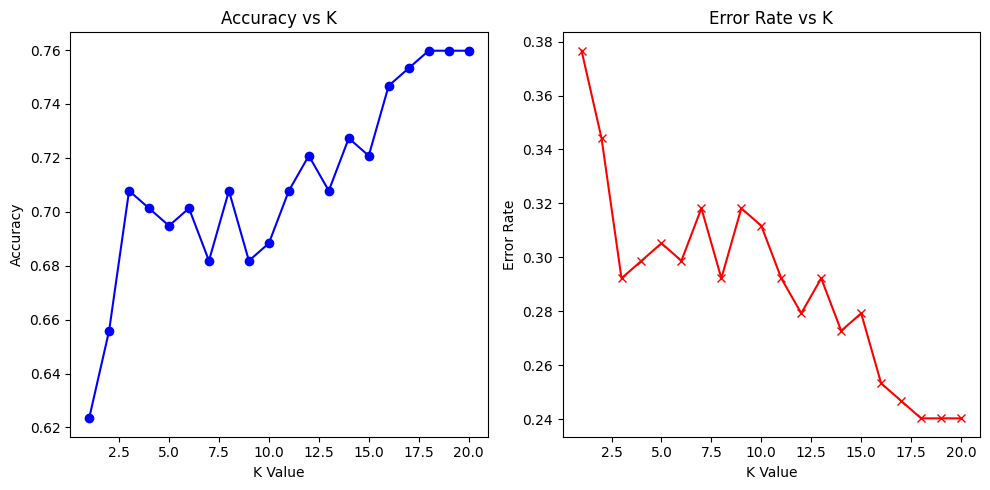

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the diabetes.csv file
diabetes = pd.read_csv("/content/diabetes.csv")

# Split into features and target
X = diabetes.drop("Outcome", axis=1)
y = diabetes["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

accuracy_list = []
error_rate = []

# Try k values from 1 to 20
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)

    acc = accuracy_score(y_test, pred_k)
    accuracy_list.append(acc)
    error_rate.append(1 - acc)

# Plot Accuracy and Error Rate
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 21), accuracy_list, marker='o', color='blue')
plt.title('Accuracy vs K')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(1, 21), error_rate, marker='x', color='red')
plt.title('Error Rate vs K')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("/content/diabetes.csv")
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.6233766233766234
Confusion Matrix:
 [[70 29]
 [29 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71        99
           1       0.47      0.47      0.47        55

    accuracy                           0.62       154
   macro avg       0.59      0.59      0.59       154
weighted avg       0.62      0.62      0.62       154

